### Get the data

In [388]:
import pandas as pd
df=pd.read_csv("data_science_task.csv")
df.head()

,account_no,gender,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,status
0,acc_00000316,F,18,12143,47000,60,1045,0.12,860,0,PAID_UP
1,acc_00000422,F,18,6021,13000,60,330,0.18,640,0,PAID_UP
2,acc_00001373,F,39,12832,13000,60,296,0.13,820,0,PAID_UP
3,acc_00001686,F,33,4867,5000,36,191,0.22,540,0,PAID_UP
4,acc_00001733,F,23,5107,22000,36,818,0.20,580,11314,LIVE


### Check balance of the data

In [389]:
df.describe()

,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance
count,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000
mean,33.429655,12711.212702,29262.793799,46.776796,906.091099,0.150078,749.478246,2216.135523
std,9.446930,6054.076749,19022.600570,14.690745,727.649879,0.049614,143.739961,6518.494486
min,18.000000,1507.000000,2000.000000,12.000000,83.000000,-0.040000,500.000000,0.000000
25%,26.000000,7981.000000,15000.000000,36.000000,452.000000,0.120000,630.000000,0.000000
50%,33.000000,11436.000000,24000.000000,48.000000,721.000000,0.150000,750.000000,0.000000
75%,40.000000,16407.500000,39000.000000,60.000000,1136.000000,0.180000,880.000000,0.000000
max,65.000000,49698.000000,116000.000000,72.000000,8430.000000,0.350000,1000.000000,99000.000000


In [390]:
print('The number of paid up loans are: ' + str(df['status'].value_counts()['PAID_UP']) + ' which is ', round(df['status'].value_counts()['PAID_UP']/sum(df['status'].value_counts()[['PAID_UP', 'DEFAULT']]) * 100,2) ,'% of the historic dataset')


The number of paid up loans are: 9308 which is  93.11 % of the historic dataset


Text(0.5, 0.98, 'Categorical Plotting')

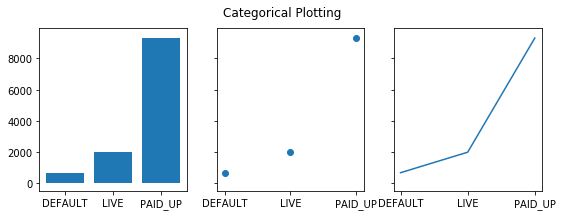

In [391]:
import matplotlib.pyplot as plt

data = df.groupby('status').count()['outstanding_balance'].to_dict()
statuses = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(statuses, values)
axs[1].scatter(statuses, values)
axs[2].plot(statuses, values)
fig.suptitle('Categorical Plotting')

### Check missing data 

If there are any missing data in our dataset, we need to deal with them before training. Data Imputation is a critical step in the Feature Engineering phase.


In [392]:
df.isna().sum()


account_no                     0
gender                         0
age                            0
income                         0
loan_amount                    0
term                           0
installment_amount             0
interest_rate                  0
credit_score_at_application    0
outstanding_balance            0
status                         0
dtype: int64

### Feature correlation
A correlation matrix is a way to show the correlation between different variables in a dataset. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data and find what , as an input into a more advanced analysis

Positive Correlation means: As feature X increases, feature Y increases and vice versa.

Negative Correlation means: As feature X go in one direction (Increase), feature Y goes in the other direction (Decrease)

Let's plot the first correlation matrix for the imbalanced data.

In [393]:
# Imbalanced DataFrame Correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance
age,1,0.193818,-0.0722302,-0.00398228,-0.0578999,0.0120862,-0.0104507,-0.0238321
income,0.193818,1,0.68092,0.0646904,0.449111,-0.901268,0.910796,0.115041
loan_amount,-0.0722302,0.68092,1,0.083624,0.713816,-0.663469,0.67163,0.189535
term,-0.00398228,0.0646904,0.083624,1,-0.447887,-0.0615976,0.0641375,0.019644
installment_amount,-0.0578999,0.449111,0.713816,-0.447887,1,-0.435688,0.44347,0.140306
interest_rate,0.0120862,-0.901268,-0.663469,-0.0615976,-0.435688,1,-0.976295,-0.0948366
credit_score_at_application,-0.0104507,0.910796,0.67163,0.0641375,0.44347,-0.976295,1,0.101903
outstanding_balance,-0.0238321,0.115041,0.189535,0.019644,0.140306,-0.0948366,0.101903,1


### Feature Engineering
1- Scale the features that needs scaling.

2- Fix the target feature imbalance problem.

3- Detect and Remove Outliers.

3- Split the data to train, validation and test.

In [394]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

std_data = ss.fit_transform(df[['age', 'income', 'loan_amount', 'installment_amount', 'interest_rate', 'credit_score_at_application', 'outstanding_balance']].values)

std_data.mean(), std_data.std()

(-1.081220222776901e-16, 1.0)

#### 1. Scaling

In [395]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is robust to outliers.

df['income_after_scaling'] = RobustScaler().fit_transform(df['income'].values.reshape(-1,1))
df['loan_amount_after_scaling'] = RobustScaler().fit_transform(df['loan_amount'].values.reshape(-1,1))
df['age_after_scaling'] = RobustScaler().fit_transform(df['age'].values.reshape(-1,1))
df['installment_amount_after_scaling'] = RobustScaler().fit_transform(df['installment_amount'].values.reshape(-1,1))
df['interest_rate_after_scaling'] = RobustScaler().fit_transform(df['interest_rate'].values.reshape(-1,1))
df['credit_score_at_application_after_scaling'] = RobustScaler().fit_transform(df['credit_score_at_application'].values.reshape(-1,1))
df['outstanding_balance_after_scaling'] = RobustScaler().fit_transform(df['outstanding_balance'].values.reshape(-1,1))


df.drop(['age', 'income', 'loan_amount', 'installment_amount', 'interest_rate', 'credit_score_at_application', 'outstanding_balance'], axis=1, inplace=True)


In [396]:
df.describe()

,term,income_after_scaling,loan_amount_after_scaling,age_after_scaling,installment_amount_after_scaling,interest_rate_after_scaling,credit_score_at_application_after_scaling,outstanding_balance_after_scaling
count,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000
mean,46.776796,0.151334,0.219283,0.030690,0.270601,0.001292,-0.002087,2216.135523
std,14.690745,0.718457,0.792608,0.674781,1.063816,0.826900,0.574960,6518.494486
min,12.000000,-1.178307,-0.916667,-1.071429,-0.932749,-3.166667,-1.000000,0.000000
25%,36.000000,-0.410016,-0.375000,-0.500000,-0.393275,-0.500000,-0.480000,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.589984,0.625000,0.500000,0.606725,0.500000,0.520000,0.000000
max,72.000000,4.540675,3.833333,2.285714,11.270468,3.333333,1.000000,99000.000000


#### 2. Fix the target feature imbalance problem (Resampling)


##### Undersampling

In [397]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# amount of default classes 689 rows.
default_df = shuffled_df.loc[shuffled_df['status'] == 'DEFAULT']

#Randomly select 689 observations.
paidup_df = shuffled_df.loc[shuffled_df['status'] == 'PAID_UP'].sample(n=689,random_state=42)
live_df = shuffled_df.loc[shuffled_df['status'] == 'LIVE'].sample(n=689,random_state=42)

normalized_df = pd.concat([default_df, paidup_df, live_df])

Text(0.5, 0.98, 'Categorical Plotting')

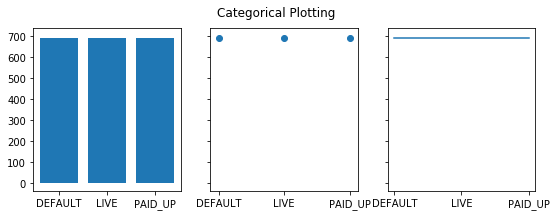

In [398]:

import matplotlib.pyplot as plt

normalized_data = normalized_df.groupby('status').count()['outstanding_balance_after_scaling'].to_dict()
statuses = list(normalized_data.keys())
values = list(normalized_data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(statuses, values)
axs[1].scatter(statuses, values)
axs[2].plot(statuses, values)
fig.suptitle('Categorical Plotting')

In [399]:

corr = normalized_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,term,income_after_scaling,loan_amount_after_scaling,age_after_scaling,installment_amount_after_scaling,interest_rate_after_scaling,credit_score_at_application_after_scaling,outstanding_balance_after_scaling
term,1,0.0863644,0.0890043,0.0137326,-0.401708,-0.0872713,0.0905624,0.00934574
income_after_scaling,0.0863644,1,0.706154,0.31479,0.484439,-0.895081,0.92642,0.304236
loan_amount_after_scaling,0.0890043,0.706154,1,0.0337904,0.753285,-0.677091,0.695445,0.422084
age_after_scaling,0.0137326,0.31479,0.0337904,1,0.0167771,-0.125203,0.147007,0.0298298
installment_amount_after_scaling,-0.401708,0.484439,0.753285,0.0167771,1,-0.457204,0.468694,0.356376
interest_rate_after_scaling,-0.0872713,-0.895081,-0.677091,-0.125203,-0.457204,1,-0.972538,-0.275723
credit_score_at_application_after_scaling,0.0905624,0.92642,0.695445,0.147007,0.468694,-0.972538,1,0.287021
outstanding_balance_after_scaling,0.00934574,0.304236,0.422084,0.0298298,0.356376,-0.275723,0.287021,1


##### Boxplot (Detecting Outliers)

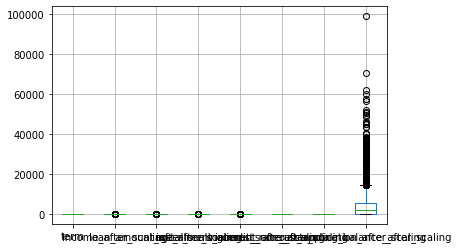

In [400]:
boxplot = normalized_df.boxplot()


In [401]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
gender_le = LabelEncoder()
term_le = LabelEncoder()
stat_le = LabelEncoder()
new_gen_labels = gender_le.fit_transform(normalized_df['gender'])
normalized_df['gender_label'] = new_gen_labels
new_leg_labels = term_le.fit_transform(normalized_df['term'])
normalized_df['term_label'] = new_leg_labels
new_status_labels = stat_le.fit_transform(normalized_df['status'])
normalized_df['status_label'] = new_status_labels
normalized_df.head()

,account_no,gender,term,status,income_after_scaling,loan_amount_after_scaling,age_after_scaling,installment_amount_after_scaling,interest_rate_after_scaling,credit_score_at_application_after_scaling,outstanding_balance_after_scaling,gender_label,term_label,status_label
2752,acc_02297886,M,60,DEFAULT,-0.651753,-0.500000,0.000000,-0.549708,1.500000,-0.92,3479.0,1,4,0
2121,acc_01778004,F,36,DEFAULT,-0.906901,-0.750000,-0.571429,-0.714912,1.333333,-0.88,934.0,0,2,0
7965,acc_06693582,M,60,DEFAULT,-0.578413,-0.625000,0.714286,-0.668129,1.666667,-0.96,2170.0,1,4,0
6675,acc_05664715,M,60,DEFAULT,-0.625883,-0.666667,-1.071429,-0.744152,0.833333,-0.72,1996.0,1,4,0
5882,acc_04993429,M,48,DEFAULT,-0.630748,-0.500000,0.142857,-0.482456,1.500000,-0.92,2830.0,1,3,0


In [402]:
gender_ohe = OneHotEncoder()
gender_feature_arr = gender_ohe.fit_transform(
                              normalized_df[['gender_label']]).toarray()
gender_feature_labels = list(gender_le.classes_)
gender_features = pd.DataFrame(gender_feature_arr, 
                            columns=gender_feature_labels)
gender_features.head()

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,F,M
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [403]:
term_ohe = OneHotEncoder()
term_feature_arr = term_ohe.fit_transform(
                              normalized_df[['term_label']]).toarray()
term_feature_labels = list(term_le.classes_)
term_features = pd.DataFrame(term_feature_arr, 
                            columns=term_feature_labels)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [404]:
stat_ohe = OneHotEncoder()
stat_feature_arr = stat_ohe.fit_transform(
                              normalized_df[['status_label']]).toarray()
stat_feature_labels = list(stat_le.classes_)
stat_features = pd.DataFrame(stat_feature_arr, 
                            columns=stat_feature_labels)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [405]:
from sklearn.model_selection import train_test_split

normalized_df.reset_index(drop=True, inplace=True)
final_data = pd.concat([normalized_df, term_features, gender_features, stat_features], axis=1)
final_data.head()


,account_no,gender,term,status,income_after_scaling,loan_amount_after_scaling,age_after_scaling,installment_amount_after_scaling,interest_rate_after_scaling,credit_score_at_application_after_scaling,...,24,36,48,60,72,F,M,DEFAULT,LIVE,PAID_UP
0,acc_02297886,M,60,DEFAULT,-0.651753,-0.500000,0.000000,-0.549708,1.500000,-0.92,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,acc_01778004,F,36,DEFAULT,-0.906901,-0.750000,-0.571429,-0.714912,1.333333,-0.88,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,acc_06693582,M,60,DEFAULT,-0.578413,-0.625000,0.714286,-0.668129,1.666667,-0.96,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,acc_05664715,M,60,DEFAULT,-0.625883,-0.666667,-1.071429,-0.744152,0.833333,-0.72,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,acc_04993429,M,48,DEFAULT,-0.630748,-0.500000,0.142857,-0.482456,1.500000,-0.92,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [406]:
current_data = final_data.loc[final_data['status'].isin(["LIVE"])]
current_data

,account_no,gender,term,status,income_after_scaling,loan_amount_after_scaling,age_after_scaling,installment_amount_after_scaling,interest_rate_after_scaling,credit_score_at_application_after_scaling,...,24,36,48,60,72,F,M,DEFAULT,LIVE,PAID_UP
1378,acc_02481394,M,24,LIVE,0.589569,-0.333333,0.357143,0.058480,-0.333333,0.32,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1379,acc_01736554,F,60,LIVE,0.387824,0.625000,0.500000,0.214912,-0.500000,0.44,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1380,acc_00364615,F,60,LIVE,0.023141,0.791667,-0.642857,0.375731,-0.333333,0.32,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1381,acc_04948866,M,60,LIVE,0.829407,-0.458333,0.571429,-0.631579,-0.500000,0.44,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1382,acc_03109663,F,36,LIVE,0.544117,1.333333,-0.285714,1.587719,-0.833333,0.68,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1383,acc_07747702,F,48,LIVE,-0.417967,0.416667,-0.428571,0.380117,0.333333,-0.24,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1384,acc_06990007,M,60,LIVE,-0.147867,0.208333,0.285714,0.000000,0.333333,-0.32,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1385,acc_03873386,M,60,LIVE,-0.456061,-0.666667,0.000000,-0.744152,0.833333,-0.68,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1386,acc_06651701,M,60,LIVE,-0.147273,-0.291667,0.357143,-0.437135,0.333333,-0.32,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1387,acc_08554391,M,36,LIVE,-0.001661,-0.208333,0.428571,-0.077485,0.166667,-0.20,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [407]:
historical_data = final_data.loc[final_data['status'].isin(["PAID_UP", "DEFAULT"])]
model_target = historical_data['DEFAULT']
historical_data

,account_no,gender,term,status,income_after_scaling,loan_amount_after_scaling,age_after_scaling,installment_amount_after_scaling,interest_rate_after_scaling,credit_score_at_application_after_scaling,...,24,36,48,60,72,F,M,DEFAULT,LIVE,PAID_UP
0,acc_02297886,M,60,DEFAULT,-0.651753,-0.500000,0.000000,-0.549708,1.500000,-0.92,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,acc_01778004,F,36,DEFAULT,-0.906901,-0.750000,-0.571429,-0.714912,1.333333,-0.88,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,acc_06693582,M,60,DEFAULT,-0.578413,-0.625000,0.714286,-0.668129,1.666667,-0.96,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,acc_05664715,M,60,DEFAULT,-0.625883,-0.666667,-1.071429,-0.744152,0.833333,-0.72,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,acc_04993429,M,48,DEFAULT,-0.630748,-0.500000,0.142857,-0.482456,1.500000,-0.92,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,acc_07293573,M,60,DEFAULT,-0.545066,-0.291667,1.000000,-0.324561,1.666667,-0.96,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6,acc_09751955,M,24,DEFAULT,-0.561206,-0.458333,0.857143,-0.039474,1.666667,-0.96,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,acc_07737077,M,48,DEFAULT,-0.712751,-0.125000,-0.285714,-0.019006,1.833333,-0.96,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,acc_06336336,F,48,DEFAULT,-1.045986,-0.583333,-0.785714,-0.561404,1.833333,-0.96,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,acc_03415625,M,60,DEFAULT,-0.614371,-0.041667,0.071429,-0.106725,1.333333,-0.88,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [408]:
historical_data.drop(['account_no', 'gender', 'term', 'outstanding_balance_after_scaling', 'status', 'gender_label', 'term_label', 'DEFAULT', 'LIVE', 'PAID_UP'], inplace=True, axis=1)
model_data = historical_data



/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [409]:
train_data, test_data, train_lbl, test_lbl = train_test_split(model_data, model_target, test_size=1/7.0, random_state=0)

train_lbl

679     1.0
557     1.0
1360    0.0
376     1.0
61      1.0
       ... 
763     0.0
835     0.0
1216    0.0
559     1.0
684     1.0
Name: DEFAULT, Length: 1181, dtype: float64

In [410]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
# try diff solver
logisticRegr.fit(train_data, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [411]:
# Returns a NumPy Array
# Predict for two Observations
predictions=logisticRegr.predict_proba(test_data)
predictions

array([[9.99890933e-01, 1.09067199e-04],
       [2.18528505e-03, 9.97814715e-01],
       [4.43456307e-03, 9.95565437e-01],
       [9.57667075e-04, 9.99042333e-01],
       [1.48171154e-03, 9.98518288e-01],
       [1.64252451e-03, 9.98357475e-01],
       [3.46876718e-03, 9.96531233e-01],
       [9.88013469e-01, 1.19865312e-02],
       [1.27018485e-03, 9.98729815e-01],
       [2.51182291e-04, 9.99748818e-01],
       [9.99922688e-01, 7.73123241e-05],
       [9.98764246e-01, 1.23575370e-03],
       [9.99770776e-01, 2.29224341e-04],
       [9.99274513e-01, 7.25487176e-04],
       [9.99081082e-01, 9.18917867e-04],
       [1.37110999e-03, 9.98628890e-01],
       [9.99607249e-01, 3.92751309e-04],
       [9.99710354e-01, 2.89645895e-04],
       [9.97050041e-01, 2.94995868e-03],
       [1.16792332e-03, 9.98832077e-01],
       [9.99919257e-01, 8.07430969e-05],
       [9.99997035e-01, 2.96487151e-06],
       [2.36538633e-03, 9.97634614e-01],
       [9.94933232e-01, 5.06676796e-03],
       [2.321637

In [412]:
score = logisticRegr.score(test_data, test_lbl)
#bad with imbalanced data
print(score)
#try auc, logloss, recall, precision (figure out which metric makes most sense)

1.0


In [413]:
from sklearn.metrics import roc_auc_score, recall_score
roc_auc = roc_auc_score(test_lbl, predictions[:,1])
roc_auc
#fpr, tpr, thresholds = metrics.roc_curve(test_lbl, predictions[:,1])

1.0

In [415]:
current_prediction_data = current_data.drop(['account_no', 'term', 'gender', 'outstanding_balance_after_scaling', 'status', 'DEFAULT', 'LIVE', 'PAID_UP', 'gender_label', 'term_label'], axis=1)
current_predictions = logisticRegr.predict_proba(current_prediction_data)


In [416]:
current_data['default_prob'] = 0
current_data['default_prob'] = current_predictions[:,1]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [417]:
current_data['expected_repayment_amount'] = (1 - current_data['default_prob'])*current_data['outstanding_balance_after_scaling']
current_data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,account_no,gender,term,status,income_after_scaling,loan_amount_after_scaling,age_after_scaling,installment_amount_after_scaling,interest_rate_after_scaling,credit_score_at_application_after_scaling,...,48,60,72,F,M,DEFAULT,LIVE,PAID_UP,default_prob,expected_repayment_amount
1378,acc_02481394,M,24,LIVE,0.589569,-0.333333,0.357143,0.058480,-0.333333,0.32,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.060580,4586.248514
1379,acc_01736554,F,60,LIVE,0.387824,0.625000,0.500000,0.214912,-0.500000,0.44,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.018894,7677.158035
1380,acc_00364615,F,60,LIVE,0.023141,0.791667,-0.642857,0.375731,-0.333333,0.32,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.057157,18161.993047
1381,acc_04948866,M,60,LIVE,0.829407,-0.458333,0.571429,-0.631579,-0.500000,0.44,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.035061,3069.469679
1382,acc_03109663,F,36,LIVE,0.544117,1.333333,-0.285714,1.587719,-0.833333,0.68,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.012144,49787.946719
1383,acc_07747702,F,48,LIVE,-0.417967,0.416667,-0.428571,0.380117,0.333333,-0.24,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.206744,11336.419809
1384,acc_06990007,M,60,LIVE,-0.147867,0.208333,0.285714,0.000000,0.333333,-0.32,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.246586,13545.632611
1385,acc_03873386,M,60,LIVE,-0.456061,-0.666667,0.000000,-0.744152,0.833333,-0.68,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.582137,1255.261103
1386,acc_06651701,M,60,LIVE,-0.147273,-0.291667,0.357143,-0.437135,0.333333,-0.32,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.260593,2618.238523
1387,acc_08554391,M,36,LIVE,-0.001661,-0.208333,0.428571,-0.077485,0.166667,-0.20,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.176993,6739.605668


In [418]:
loan_book_bal = sum(current_data['expected_repayment_amount'])
loan_book_bal

7000864.469064403

In [420]:
sum(current_data['outstanding_balance_after_scaling'])*0.9

7257024.0

In [421]:
7000864.469064403/7257024.0

0.9647018487281293